# Proyecto Final

## Introducción

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

In [10]:
# importamos las liberías necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score




In [11]:
# importamos los archivos csv
contract = pd.read_csv('contract.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')
personal = pd.read_csv('personal.csv')

In [12]:
# leemos los archivos csv

contract.info()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


El archivo 'contract'no contiene valores faltantes y las columnas 'BeginDate y EndDate' No están en el tipo de datos correcto, pero como la columna 'EndDate' pero como no son necesarias para entrenar el modelo, solo para la nueva columna 'objetivo', lo voy a dejar así.

In [13]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [14]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [15]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Los archivos 'internet, phone, personal' no contienen valores faltantes y sus columnas están en el tipo de datos correcto

In [16]:
# Verificamos si hay valores nulos en los archivos csv
contract.isnull().sum(), personal.isnull().sum(), internet.isnull().sum(), phone.isnull().sum()

(customerID          0
 BeginDate           0
 EndDate             0
 Type                0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 dtype: int64,
 customerID       0
 gender           0
 SeniorCitizen    0
 Partner          0
 Dependents       0
 dtype: int64,
 customerID          0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 dtype: int64,
 customerID       0
 MultipleLines    0
 dtype: int64)

In [17]:
# Verificamos si hay valores duplicados en los archivos csv
contract.duplicated().sum(), personal.duplicated().sum(), internet.duplicated().sum(), phone.duplicated().sum()

(0, 0, 0, 0)

No hay valores nulos ni duplicados en ninguno de los DataFrame

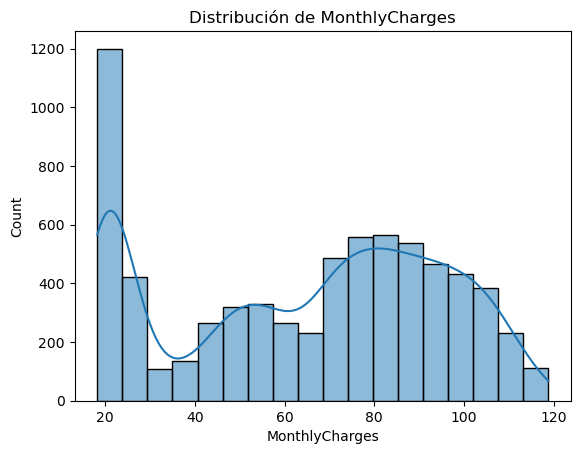

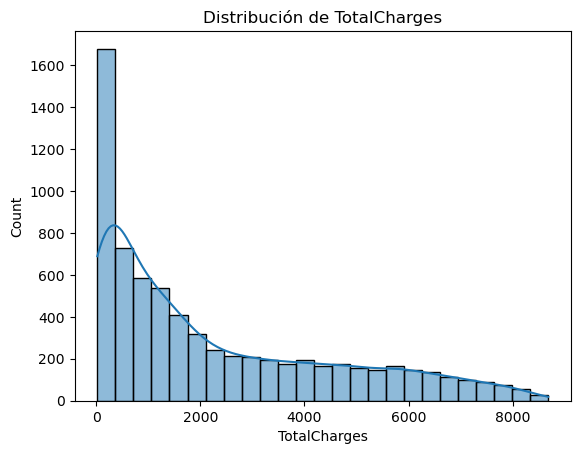

In [18]:
# Distribución de MonthlyCharges
sns.histplot(contract['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges')
plt.show()

# Distribución de TotalCharges
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
sns.histplot(contract['TotalCharges'].dropna(), kde=True)
plt.title('Distribución de TotalCharges')
plt.show()

En la distribución de 'MonthlyCharges' se observa que la mayoría de los clientes paga cargos mensuales bajos, alrededor de 20 dólares. Después de este grupo, los planes con cargos entre 70 y 100 dólares son los más populares, lo que indica una segunda preferencia por planes más completos o con más servicios.

En la distribución de 'TotalCharges' se observa un pico de aproximadamente 1,600 clientes que han pagado alrededor de 250 dólares en total. A partir de ahí, la cantidad de clientes disminuye progresivamente hasta los valores más altos, cercanos a los 8,000 dólares, lo cual sugiere que esos clientes llevan mucho más tiempo utilizando el servicio.

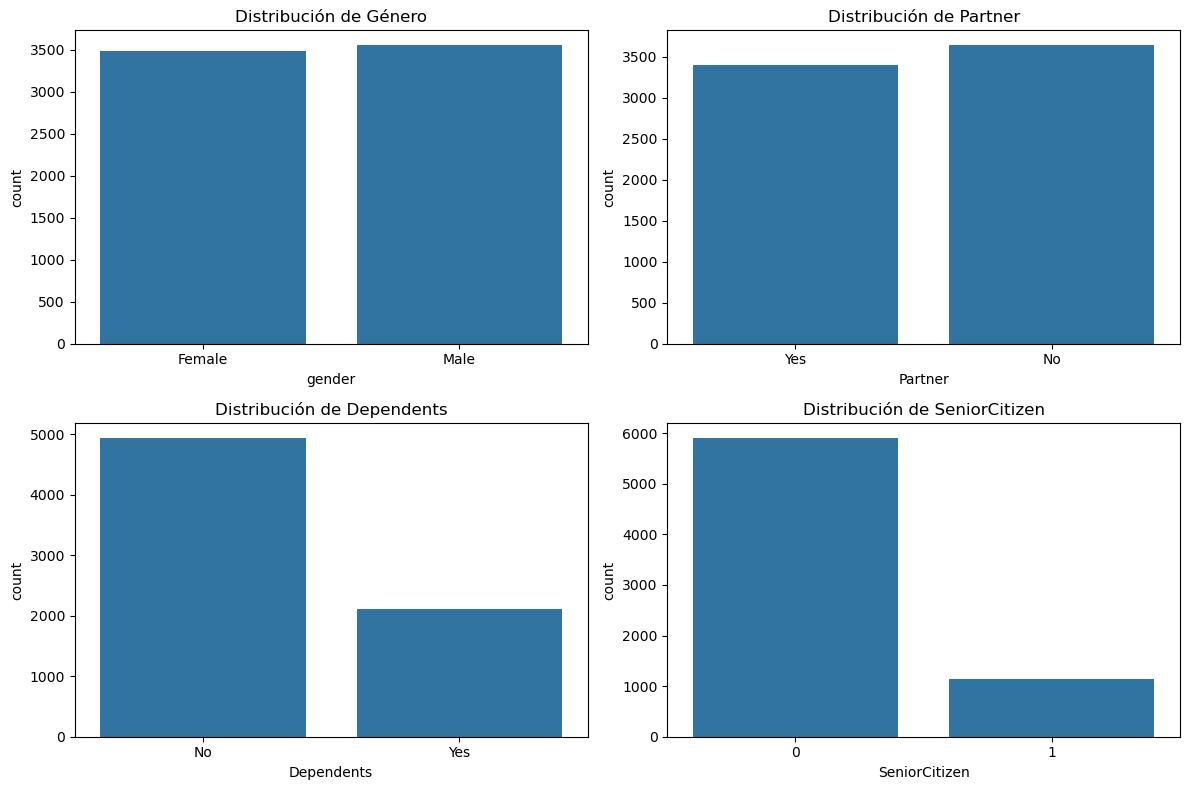

In [19]:
# Distribución de variables categóricas en df personal
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='gender', data=personal, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Género')

sns.countplot(x='Partner', data=personal, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Partner')

sns.countplot(x='Dependents', data=personal, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Dependents')

sns.countplot(x='SeniorCitizen', data=personal, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de SeniorCitizen')

plt.tight_layout()
plt.show()

Observamos que las distribuciones de 'Género' y 'Partner' están balanceadas. Sin embargo, en 'Dependents', hay más del doble de clientes que no tienen dependientes en comparación con los que sí tienen. Además, en 'SeniorCitizen', solo alrededor de 1,000 clientes se identifican como adultos mayores, lo que representa una pequeña proporción del total.

In [20]:
# Unimos los dataframes contract, personal, internet y phone
df = contract.merge(personal, on='customerID', how='left') \
    .merge(internet, on='customerID', how='left') \
    .merge(phone, on='customerID', how='left')

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
# Atendemos los valores faltantes en el dataframe
df.dropna(subset=['TotalCharges'], inplace=True)

cols_internet = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df[cols_internet] = df[cols_internet].fillna('No')

df['MultipleLines'] =  df['MultipleLines'].fillna('No')

# Creamos la columna objetivo 'is_active' para indicar si el cliente está activo o no

df['is_active'] = df['EndDate'] == 'No'

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 
 17  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,is_active
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,True
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,True
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,False
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,True
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,False


Se atendieron los valores faltantes del dataframe eliminando las filas con 'TotalCharges' nulo y reemplazando los valores faltantes en servicios de Internet y líneas múltiples con 'No'. Además, se creó la columna 'is_active' para identificar fácilmente a los clientes activos, tomando como referencia si el campo 'EndDate' es igual a 'No'

In [23]:
# Comprobamos el balanceo de clases

df['is_active'].value_counts()

is_active
True     5163
False    1869
Name: count, dtype: int64

Notamos un claro desbalanceo de clases que necesitamos darle atención.

In [24]:
# Separamos las características y el objetivo
X = df.drop(['is_active', 'BeginDate', 'EndDate'], axis=1)
y = df['is_active']

# Convertir las variables categóricas a variables dummy
X = pd.get_dummies(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Aplicamos SMOTE para hacer oversampling en el conjunto de entrenamiento
smote = SMOTE(random_state=12345)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de SMOTE
print(f"Distribución de clases en el conjunto de entrenamiento antes de SMOTE: {y_train.value_counts()}")
print(f"Distribución de clases en el conjunto de entrenamiento después de SMOTE: {y_resampled.value_counts()}")

X_resampled.head()


c:\Users\lalox\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Distribución de clases en el conjunto de entrenamiento antes de SMOTE: is_active
True     3870
False    1404
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento después de SMOTE: is_active
False    3870
True     3870
Name: count, dtype: int64


,MonthlyCharges,TotalCharges,SeniorCitizen,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,...,customerID_9979-RGMZT,customerID_9985-MWVIX,customerID_9986-BONCE,customerID_9987-LUTYD,customerID_9992-RRAMN,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,73.85,926.25,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False
1,79.25,5731.85,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,True,False,False,True
2,43.85,43.85,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
3,103.45,3994.45,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True
4,20.20,1027.25,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,Fals

Ahora las clases están balanceadas y las variables categóricas se convirtieron de dummies para que el modelo pueda trabajar con ellas, se divierieron los datos en entrenamiento y prueba.

In [25]:
# Función para evaluar el modelo

import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

c:\Users\lalox\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


          train  test
Accuracy   0.90  0.80
F1         0.91  0.87
APS        0.96  0.93
ROC AUC    0.97  0.84


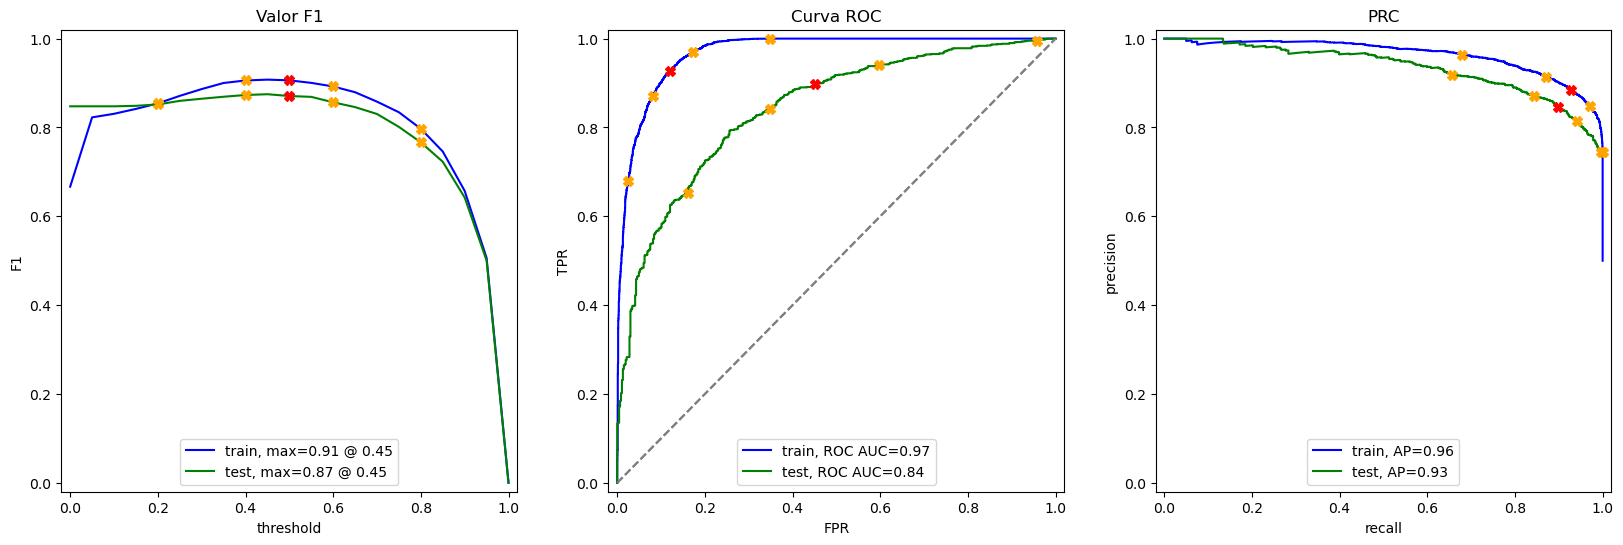

In [31]:
# Entrenamos el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=12345)
logistic_model.fit(X_resampled, y_resampled)

# Evaluamos el modelo de Regresión Logística
evaluate_model(logistic_model, X_resampled, y_resampled, X_test, y_test)

          train  test
Accuracy   0.87  0.78
F1         0.86  0.85
APS        0.95  0.93
ROC AUC    0.95  0.84


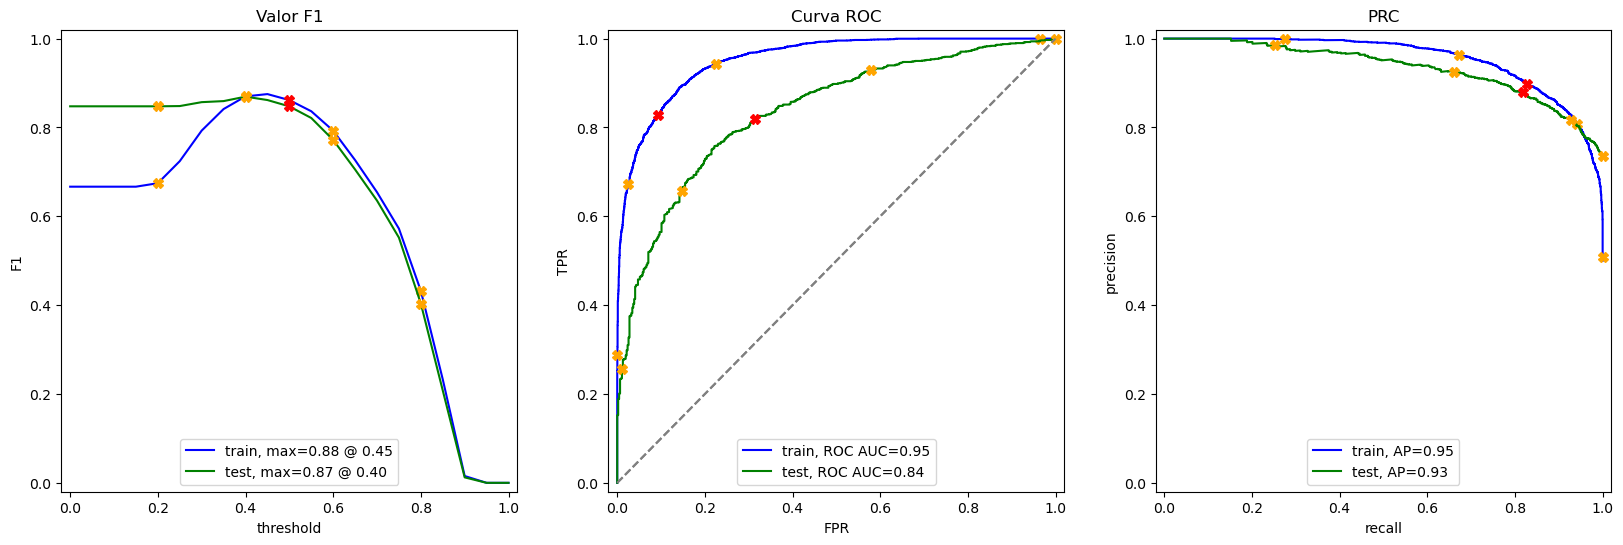

In [34]:
# Entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=12345, n_jobs=-1, max_depth=20, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

# Evaluamos el modelo de Random Forest
evaluate_model(rf_model, X_resampled, y_resampled, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3870, number of negative: 3870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 7740, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
          train  test
Accuracy   0.91  0.79
F1         0.91  0.86
APS        0.98  0.93
ROC AUC    0.98  0.84


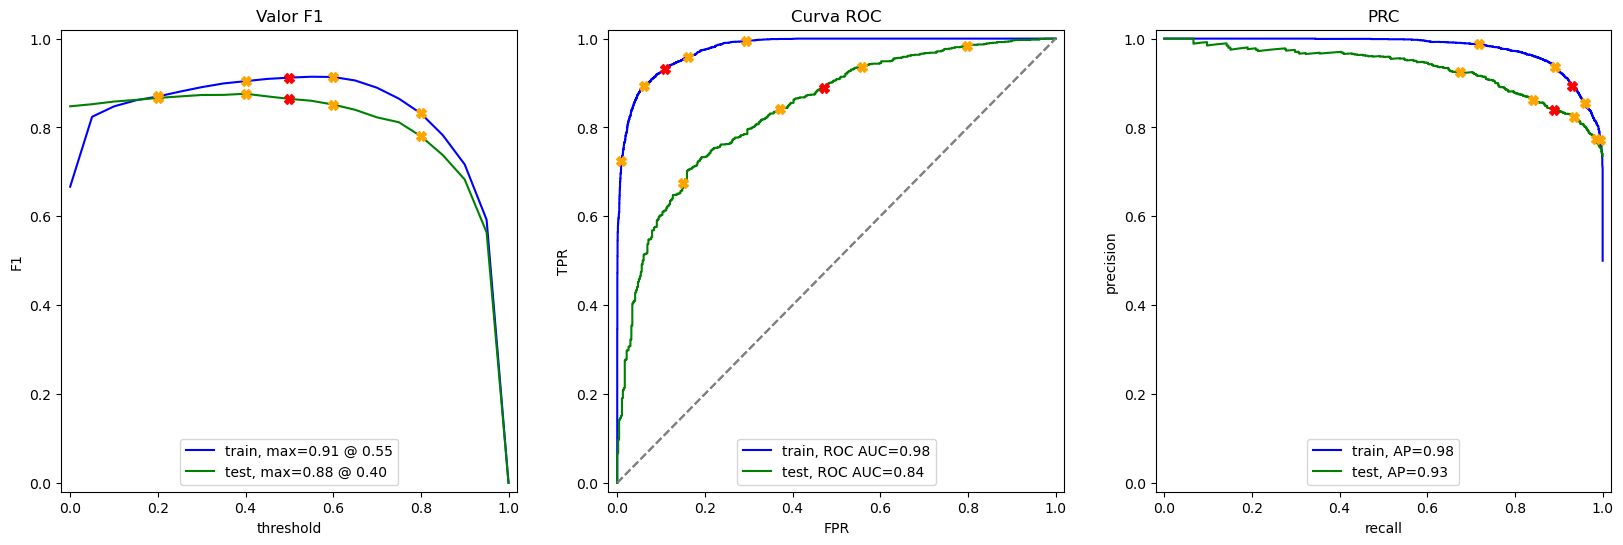

In [27]:
# Entrenamos el model XGBoost
lgbm_model = LGBMClassifier(random_state=12345, class_weight='balanced')
lgbm_model.fit(X_resampled, y_resampled)

# Evaluamos el modelo
evaluate_model(lgbm_model, X_resampled, y_resampled, X_test, y_test)


## Conclusión

El modelo LightGBM ha demostrado ser muy robusto, eficiente y adecuado para este tipo de tarea de clasificación binaria. Su capacidad para manejar grandes volúmenes de datos, su rapidez en el entrenamiento y su alto rendimiento en las métricas clave lo convierten en una excelente opción para este proyecto. Además, su flexibilidad y manejo del desequilibrio de clases lo hacen una solución robusta para datos del mundo real, donde las clases suelen no estar perfectamente balanceadas.

Por todo esto, LightGBM es el modelo más recomendable para este proyecto, ya que ofrece un excelente balance entre velocidad y precisión.

## Informe de solución

### **¿Qué pasos del plan se realizaron y cuáles se omitieron?**

1.- **Revisión y limpieza de los datos:**
Se revisaron valores nulos, se identificaron variables categóricas y numéricas, y se analizaron sus distribuciones.

2.- **Unificación de los datasets:**
Se combinaron los archivos contract, personal, internet y phone usando customerID como clave principal, lo que permitió tener toda la información del cliente en un solo DataFrame.

3.- **Creación de variables útiles:**
Se generó una nueva columna is_active que indica si un cliente sigue activo. Esto se hizo con base en la columna EndDate, asignando False cuando hay fecha de cancelación y True cuando el valor es 'No'.

4.- **Preparación para modelo predictivo:**
Se codificaron las variables categóricas usando get_dummies, se eliminaron columnas irrelevantes como BeginDate y EndDate, y se dividieron los datos en conjuntos de entrenamiento y prueba. Además, se aplicó SMOTE para balancear las clases en el conjunto de entrenamiento.

5.- **Entrenamiento y evaluación del modelo predictivo:**
Se entrenaron varios modelos: Regresión Logística y LightGBM. Cada uno fue evaluado con métricas como Accuracy, F1-score, AUC-ROC y Average Precision Score. El modelo con mejor desempeño fue LightGBM.

### **¿Qué dificultades encontraste y cómo las resolviste?**

1.- **Desbalance de clases:**
Al principio, había muchos más clientes activos que inactivos. Se resolvió aplicando SMOTE para hacer oversampling y balancear las clases.

2.- **Advertencia de convergencia en Regresión Logística:**
Se presentó una advertencia al entrenar Logistic Regression. Se consideró aumentar max_iter pero al final se optó por otros modelos más robustos.

3.- **Error con LightGBM:**
Se detectó un error de cantidad de columnas al hacer predicciones. Esto se resolvió asegurando que el X_test tuviera las mismas columnas que el set de entrenamiento X_resampled después de aplicar get_dummies.

### **¿Cuáles fueron algunos de los pasos clave?**

1.- **Aplicar SMOTE:**
Fue clave para balancear las clases y mejorar la capacidad del modelo para predecir correctamente a los clientes inactivos.

2.- **Evaluación completa:**
Comparar los modelos con varias métricas ayudó a elegir el mejor modelo, no solo con base en Accuracy, sino también en F1 y AUC.

3.- **Uso de LightGBM:**
Este modelo logró mantener un buen equilibrio entre predicciones correctas y tiempo de ejecución.

### **¿Cuál es tu modelo final y qué nivel de calidad tiene?**
El modelo final seleccionado fue LightGBM con parámetros por defecto, más class_weight='balanced'.
Las métricas en el conjunto de prueba fueron:

-**Accuracy: 0.79**

-**F1: 0.86**

-**Average Precision Score: 0.93**

-**ROC AUC: 0.84**

Estos resultados indican un buen desempeño general del modelo, especialmente para una tarea con clases originalmente desbalanceadas. El modelo es capaz de identificar clientes inactivos con buena precisión, lo cual es útil para tomar decisiones de negocio.